# TITANIC DISASTER

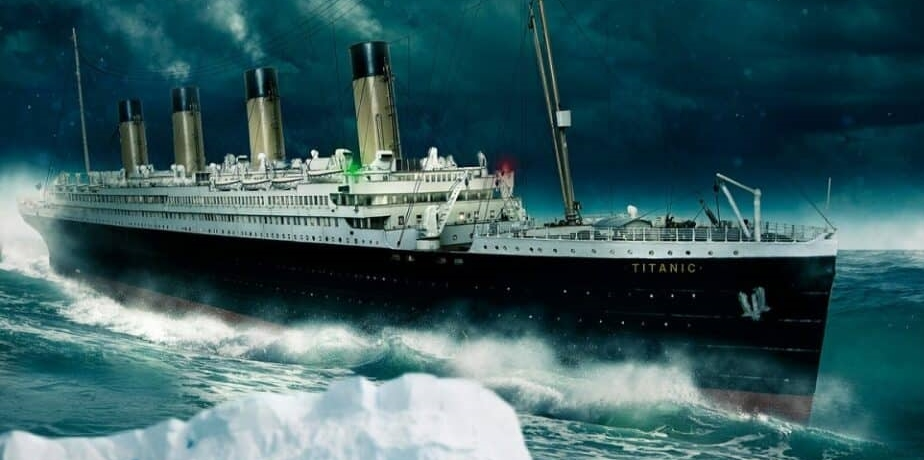

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Loading the data

In [2]:
train_data = pd.read_csv("C:\\Users\\dell\\Desktop\\Projetos\\Titanic Disaster\\Train.csv")
test_data = pd.read_csv("C:\\Users\\dell\\Desktop\\Projetos\\Titanic Disaster\\Test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Preliminary checking

In [5]:
for i in range(2):
    if i == 0:
        print("Amount of row of the dataset of train is: {}".format(train_data.shape[i]))
    else:
        print("Amount of column of the dataset of train is:{}". format(train_data.shape[i]))

for i in range(2):
    if i == 0:
        print("Amount of row of the dataset of test is: {}".format(test_data.shape[i]))
    else:
        print("Amount of column of the dataset of test is:{}". format(test_data.shape[i]))

Amount of row of the dataset of train is: 891
Amount of column of the dataset of train is:12
Amount of row of the dataset of test is: 418
Amount of column of the dataset of test is:11


In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Missing data
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#How much missing data is
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

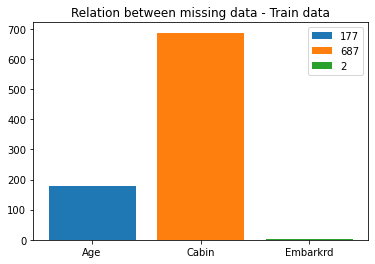

In [10]:
#Relation of missing data
plt.bar('Age',train_data['Age'].isnull().sum(),label=train_data['Age'].isnull().sum())
plt.bar("Cabin",train_data['Cabin'].isnull().sum(),label=train_data['Cabin'].isnull().sum())  
plt.bar("Embarkrd",train_data['Embarked'].isnull().sum(),label=train_data['Embarked'].isnull().sum())
plt.title("Relation between missing data - Train data")
plt.legend()

In [11]:
test_data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

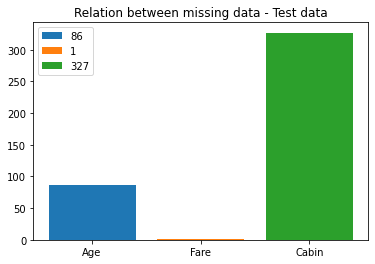

In [13]:
plt.bar("Age",test_data['Age'].isnull().sum(),label=test_data['Age'].isnull().sum())
plt.bar("Fare",test_data['Fare'].isnull().sum(),label=test_data['Fare'].isnull().sum())
plt.bar("Cabin",test_data['Cabin'].isnull().sum(),label=test_data['Cabin'].isnull().sum())
plt.title("Relation between missing data - Test data")
plt.legend()

In [14]:
#How much missing data is (percentual)
null_percents_train = ((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending=False)

In [15]:
null_percents_train

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [16]:
null_percents_test = ((test_data.isnull().sum()/test_data.shape[0])*100).sort_values(ascending=False)

In [17]:
null_percents_test

Cabin          78.229665
Age            20.574163
Fare            0.239234
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

In [18]:
#Statistical distribution
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploratory Data Analysis

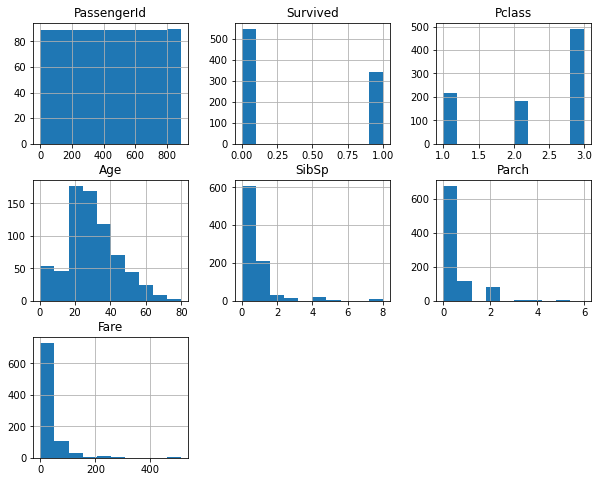

In [20]:
#Variables histogram
train_data.hist(figsize=(10,8));

In [21]:
#train_data.groupby(['Sex','Survived']).count()
#train_data[['Pclass','Sex']].groupby('Sex').mean()
#x=train_data[ (train_data['Survived']==1) & (train_data['Embarked']=='S') ]

In [22]:
new_data=train_data[train_data['Survived']==1]
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
#Which sex has the most amount of survived?
new_data[['Sex','Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,233
male,109


In [24]:
male = new_data.loc[train_data['Sex']=='male']
female = new_data.loc[train_data['Sex']=='female']
m = male['Sex']
m = m.count()
f = female['Sex']
f=f.count()

print("%d, %d"%(m,f))

109, 233


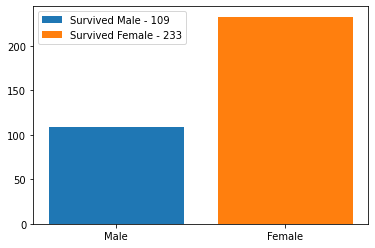

In [25]:
plt.bar("Male",m,label="Survived Male - %d"%(m))
plt.bar("Female",f,label="Survived Female - %d"%(f))
plt.legend()

In [26]:
media_m = train_data.loc[train_data['Sex']=='male']
x = (media_m['Survived'].sum()/media_m.shape[0])*100
x

18.890814558058924

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

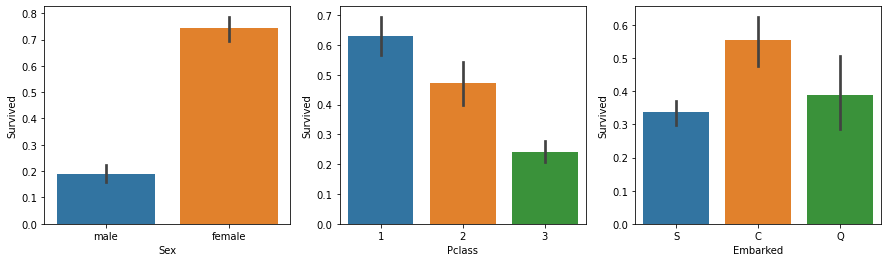

In [27]:
#Which is the sex, pclass and embarked that has the most chance to survive
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sb.barplot(x='Sex',y='Survived',data=train_data,ax=axis1)
sb.barplot(x='Pclass',y='Survived',data=train_data,ax=axis2)
sb.barplot(x='Embarked',y='Survived',data=train_data,ax=axis3)


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


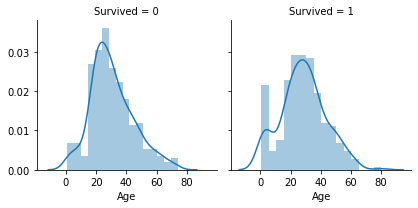

In [28]:
#Influence of age on probability of survival
age_survived = sb.FacetGrid(train_data, col='Survived')
age_survived.map(sb.distplot, 'Age')

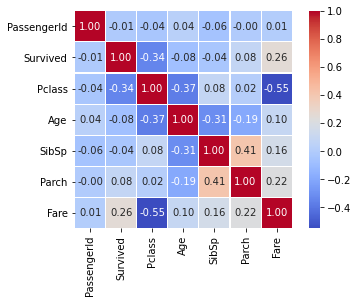

In [29]:
sb.heatmap(train_data.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

# Data preparation

In [30]:
train_x = train_data.shape[0]
test_x = test_data.shape[0]

In [31]:
target = train_data['Survived']
train_data.drop(['Survived'], axis=1, inplace=True)

In [32]:
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
merged = pd.concat(objs=[train_data,test_data], axis=0).reset_index(drop=True)

In [34]:
merged

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
#Unnecessary ariables 
merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:
merged.isnull().sum()
perc = ((merged.isnull().sum()/merged.shape[0])*100).sort_values(ascending=True)
perc

Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.076394
Embarked     0.152788
Age         20.091673
dtype: float64

In [37]:
#Imputation of data

#age - median
merged['Age'].fillna(merged['Age'].median(), inplace=True)

#fare - median
merged['Fare'].fillna(merged['Fare'].median(), inplace=True)

#embarked - mode
merged['Embarked'].fillna(merged['Embarked'].value_counts()[0], inplace=True)

In [38]:
merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
#Converting Sex in 0 and 1
merged['Sex'] = merged['Sex'].map({'male':0, 'female':1})

In [40]:
#Dummies variables for "Embarked"
embarked_dummies = pd.get_dummies(merged['Embarked'], prefix='Embarked')
merged = pd.concat([merged, embarked_dummies], axis=1)
merged.drop('Embarked', axis=1, inplace=True)

In [41]:
merged

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


In [42]:
#Recovering Train and Test data
train = merged.iloc[:train_x]
test = merged.iloc[train_x:]

In [43]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,0,1
889,1,0,26.0,0,0,30.0000,0,1,0,0


In [44]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
891,3,0,34.5,0,0,7.8292,0,0,1,0
892,3,1,47.0,1,0,7.0000,0,0,0,1
893,2,0,62.0,0,0,9.6875,0,0,1,0
894,3,0,27.0,0,0,8.6625,0,0,0,1
895,3,1,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


# Machine learning model and evaluation

In [45]:
#Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train,target)

#Accuracy
acc_lr = round(lr_model.score(train,target)*100,3)
acc_lr

80.135

In [46]:
#Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

#Accuracy
acc_tree = round(tree_model.score(train, target)*100,3)
acc_tree

82.716

In [47]:
model=[[acc_lr,acc_tree]]
new_table = pd.DataFrame(model,columns=['Logistic Regression Model','Decision Tree Model'])
new_table.index = ['Accuracy']
new_table

,Logistic Regression Model,Decision Tree Model
Accuracy,80.135,82.716


In [48]:
#Cross Validation
scores_lr_model = cross_val_score(lr_model,train.values,target,cv=5)
scores_tree_model = cross_val_score(tree_model,train.values,target,cv=5)
cross_lr = np.mean(scores_lr_model)*100
cross_tree = np.mean(scores_tree_model)*100
print(cross_lr)
print(cross_tree)

78.78852551628898
80.91959073504486


In [49]:
cross = [[cross_lr,cross_tree]]
new_table_cv = pd.DataFrame(cross,columns=['Logistic Regression CV','Decision Tree CV'])
new_table_cv.index = [['Cross validation']]
new_table_cv

,Logistic Regression CV,Decision Tree CV
Cross validation,78.788526,80.919591


In [50]:
#Testing model
person_1 = np.array([1,1,2,0,0,7.35,0,0,1,0]).reshape((1,-1))
person_2 = np.array([1,0,5,0,0,22.7,0,0,1,0]).reshape((1,-1))
person_3 = np.array([3,1,80,1,0,15.3,0,1,0,0]).reshape((1,-1))

people = [person_1,person_2,person_3]

for i in range (len(people)):
    if tree_model.predict(people[i]) == 1:
        print("Survived")
    else:
        print("Non survived")

Non survived
Survived
Survived
